In [1]:
import pandas as pd

data = {}

path_to_data = r'all_time-series/ts_cut'

import os
import numpy as np
import re

parser_regex = r'(ihb|china|rmet)_(open|close)_strategy-(\d)_(GSR|noGSR).npy'
extractor = re.compile(parser_regex)

items = {atlas_name: {dataset_name: []
                      for dataset_name in ['china', 'ihb', 'rmet']}
         for atlas_name in ['HCPex', 'Brainnetome', 'AAL', 'Schaefer200']}

for root, dirs, files in os.walk(path_to_data):
    for file in files:
        atlas = root.split(os.sep)[1]
        source = root.split(os.sep)[2]
        items[atlas][source].append(np.load(os.path.join(root, file)))

In [63]:
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform

sum_measurements = 246 * [0.0]
for guy in range(0, 10):
    i_measurements = items['Brainnetome']['rmet'][12 * guy][0]
    i_corr = np.corrcoef(i_measurements.T)
    i_corr = (i_corr + i_corr.T) / 2
    sum_measurements += i_corr
np.fill_diagonal(sum_measurements, 1)

dissimilarity = 1 - np.abs(sum_measurements)
linkage_matrix = linkage(squareform(dissimilarity), method='average')
labels = fcluster(linkage_matrix, 0.5, criterion='distance')

labels


IndexError: list index out of range

In [55]:
clusters = np.unique(labels)
n_clusters = len(clusters)

cluster_corr = np.zeros((n_clusters, n_clusters))

for i, cl_i in enumerate(clusters):
    idx_i = np.where(labels == cl_i)[0]
    for j, cl_j in enumerate(clusters):
        idx_j = np.where(labels == cl_j)[0]
        sub_corr = corr[np.ix_(idx_i, idx_j)]
        
        cluster_corr[i, j] = abs(np.mean(sub_corr))

np.fill_diagonal(cluster_corr, 1) 

print("Матрица корреляций между кластерами(человек 1, глаза закрыты):")
print(cluster_corr)


Матрица корреляций между кластерами(человек 1, глаза закрыты):
[[1.         0.41763261 0.33400803 ... 0.05423792 0.02007423 0.03810897]
 [0.41763261 1.         0.32556611 ... 0.23133279 0.04448453 0.0408641 ]
 [0.33400803 0.32556611 1.         ... 0.1738314  0.03978112 0.03615403]
 ...
 [0.05423792 0.23133279 0.1738314  ... 1.         0.2460764  0.01531539]
 [0.02007423 0.04448453 0.03978112 ... 0.2460764  1.         0.04710438]
 [0.03810897 0.0408641  0.03615403 ... 0.01531539 0.04710438 1.        ]]


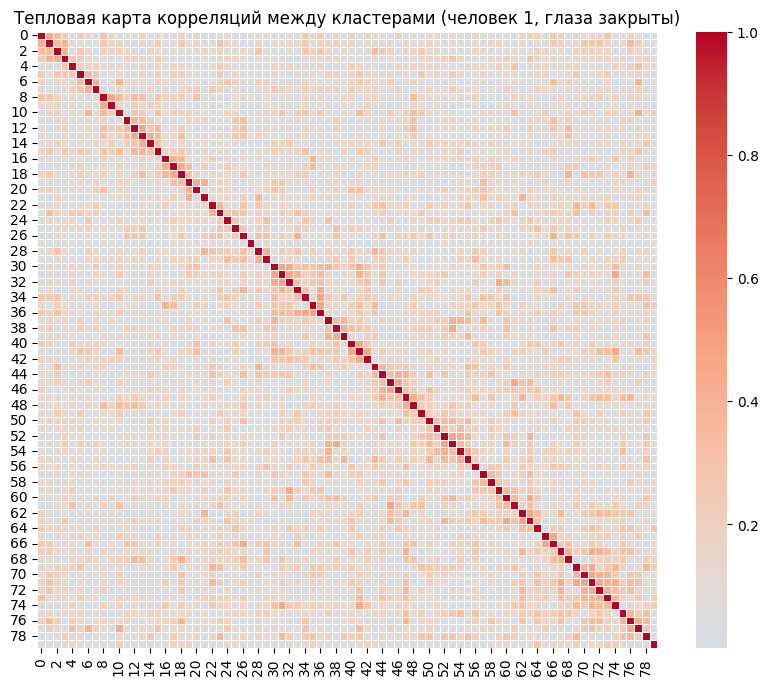

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))

sns.heatmap(cluster_corr, fmt=".2f", cmap="coolwarm", center=0.05, linewidths=0.5)

plt.title("Тепловая карта корреляций между кластерами (человек 1, глаза закрыты)")

plt.show()

Тот же чел, глаза открыты

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

In [65]:
plot_confusion_matrix(y_true, y_pred, target_names)

NameError: name 'y_true' is not defined

In [ ]:
measurements_open = items['Brainnetome']['rmet'][12][0]
corr_open = np.corrcoef(measurements_open.T)
corr_open = (corr_open + corr_open.T) / 2
np.fill_diagonal(corr_open, 1)

dissimilarity_open = 1 - np.abs(corr_open)
hierarchy_open = linkage(squareform(dissimilarity_open), method='average')
labels_open = fcluster(hierarchy_open, 0.5, criterion='distance')

In [59]:
clusters_open = np.unique(labels_open)
n_clusters_open = len(clusters_open)

cluster_corr_open = np.zeros((n_clusters_open, n_clusters_open))

for i, cl_i in enumerate(clusters_open):
    idx_i = np.where(labels_open == cl_i)[0]
    for j, cl_j in enumerate(clusters_open):
        idx_j = np.where(labels_open == cl_j)[0]
        sub_corr_open = corr_open[np.ix_(idx_i, idx_j)]
        
        cluster_corr_open[i, j] = abs(np.mean(sub_corr_open))

np.fill_diagonal(cluster_corr_open, 1) 

print("Матрица корреляций между кластерами (человек 1, глаза открыты):")
print(cluster_corr_open)


Матрица корреляций между кластерами (человек 1, глаза открыты):
[[1.00000000e+00 2.06109798e-01 1.22671617e-01 ... 1.04762957e-01
  3.15699372e-02 1.11031898e-02]
 [2.06109798e-01 1.00000000e+00 4.32305681e-02 ... 5.35631806e-04
  2.00664616e-02 8.80132886e-02]
 [1.22671617e-01 4.32305681e-02 1.00000000e+00 ... 1.54860845e-01
  1.40227600e-01 2.02793924e-01]
 ...
 [1.04762957e-01 5.35631806e-04 1.54860845e-01 ... 1.00000000e+00
  4.21787043e-01 2.39287528e-01]
 [3.15699372e-02 2.00664616e-02 1.40227600e-01 ... 4.21787043e-01
  1.00000000e+00 3.30954688e-01]
 [1.11031898e-02 8.80132886e-02 2.02793924e-01 ... 2.39287528e-01
  3.30954688e-01 1.00000000e+00]]


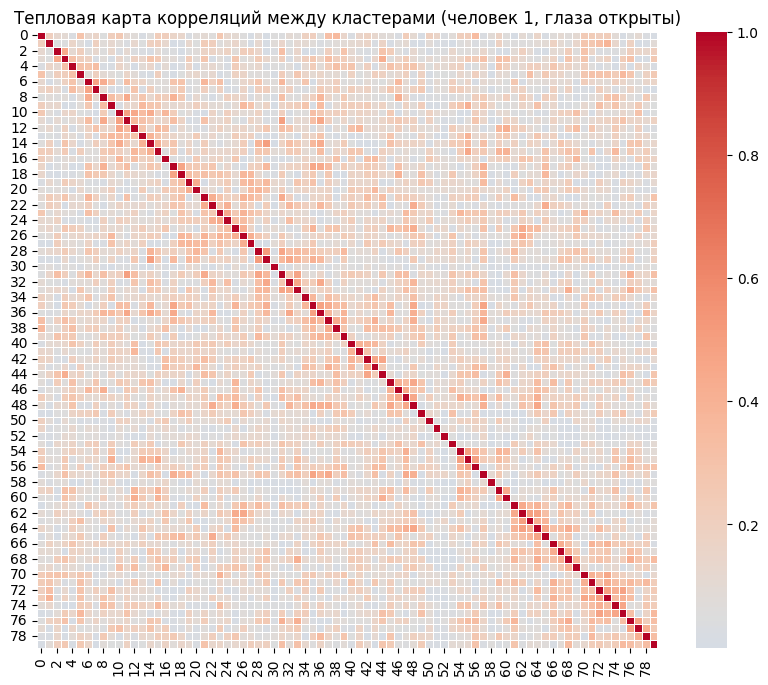

In [60]:
plt.figure(figsize=(10, 8))

sns.heatmap(cluster_corr_open, fmt=".2f", cmap="coolwarm", center=0.05, linewidths=0.5)

plt.title("Тепловая карта корреляций между кластерами (человек 1, глаза открыты)")

plt.show()

In [61]:
diff_matrix = np.abs(cluster_corr - cluster_corr_open)
mean_abs_diff = np.mean(np.abs(diff_matrix))
print("Средняя абсолютная разница:", mean_abs_diff)


Средняя абсолютная разница: 0.10576778322440986


Черновик

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform

measurements = items['Brainnetome']['rmet'][0][0]
corr = np.corrcoef(measurements.T)
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

dissimilarity = 1 - np.abs(corr)
linkage_matrix = linkage(squareform(dissimilarity), method='average')

k = 80
low = 0
high = np.max(linkage_matrix[:, 2])
tolerance = 1e-5  # точность поиска
threshold = None

while high - low > tolerance:
    mid = (low + high) / 2
    temp_labels = fcluster(linkage_matrix, t=mid, criterion='distance')
    n_clusters = len(np.unique(temp_labels))
    
    if n_clusters > k:
        low = mid
    elif n_clusters < k:
        high = mid
    else:
        threshold = mid
        break

if threshold is None:
    threshold = (low + high) / 2

labels = fcluster(linkage_matrix, t=threshold, criterion='distance')

print("Пороговое расстояние:", threshold)
print("Число кластеров:", len(np.unique(labels)))
